# Ready STEDy GO


In [3]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

## 1 Opisivanje podataka

###1.1 Podaci

In [4]:
df_ucenik = pd.read_csv("ucenik.csv", encoding= 'windows-1250', sep=';')

In [5]:
df_ucenik

,rb,vrijeme_igre,spol,ocjena,vrijeme_pon
0,1.0,47,ž,dobar,3
1,2.0,177,m,dobar,148
2,3.0,124,ž,vrlo dobar,96
3,4.0,135,m,dobar,95
4,5.0,69,m,vrlo dobar,52
5,6.0,88,m,nedovoljan,72
6,7.0,0,m,dobar,37
7,8.0,69,m,dobar,35
8,9.0,120,ž,izvrstan,104
9,10.0,0,m,dobar,38


In [6]:
df_ucenik.dtypes

rb              float64
vrijeme_igre      int64
spol             object
ocjena           object
vrijeme_pon       int64
dtype: object

###1.2. Frekvencije i relativne frekvencije

In [7]:
ranges = [-1, 30, 60, 90, 120, 150, 180, 210, 240, 270]
bins = df_ucenik.groupby(pd.cut(df_ucenik.vrijeme_igre, ranges)).count()
bins[['vrijeme_igre']]

,vrijeme_igre
vrijeme_igre,
"(-1, 30]",5
"(30, 60]",3
"(60, 90]",7
"(90, 120]",2
"(120, 150]",2
"(150, 180]",2
"(180, 210]",2
"(210, 240]",0
"(240, 270]",1


**Zadatak 1.2**

In [8]:
df_vrijeme = bins[['vrijeme_igre']]

df_vrijeme = df_vrijeme.assign(postotak=lambda x: round((x.vrijeme_igre / (df_vrijeme['vrijeme_igre'].sum()))*100, 1))
print(df_vrijeme)


              vrijeme_igre  postotak
vrijeme_igre                        
(-1, 30]                 5      20.8
(30, 60]                 3      12.5
(60, 90]                 7      29.2
(90, 120]                2       8.3
(120, 150]               2       8.3
(150, 180]               2       8.3
(180, 210]               2       8.3
(210, 240]               0       0.0
(240, 270]               1       4.2


###1.3. Stupčasti dijagram i histogram

In [9]:
df_sub = df_ucenik[ df_ucenik.vrijeme_igre < 120]
round(df_sub['vrijeme_igre'].count()/df_ucenik['vrijeme_igre'].count() * 100, 2)


66.67

In [10]:
df_sub = df_ucenik[ df_ucenik.vrijeme_igre > 180]
df_sub['vrijeme_igre'].count()/df_ucenik['vrijeme_igre'].count() * 100


12.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Broj učenika')

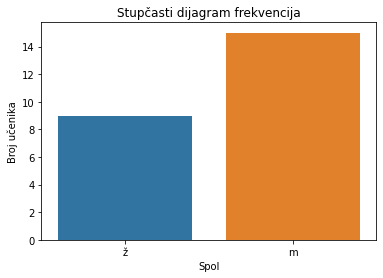

In [11]:
sns.countplot(df_ucenik['spol'])
plt.title('Stupčasti dijagram frekvencija')
plt.xlabel('Spol')
plt.ylabel('Broj učenika')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Broj učenika')

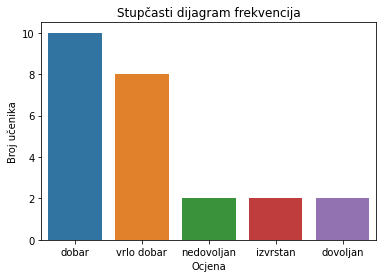

In [12]:
sns.countplot(df_ucenik['ocjena'])
plt.title('Stupčasti dijagram frekvencija')
plt.xlabel('Ocjena')
plt.ylabel('Broj učenika')

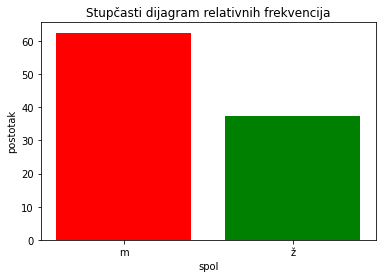

In [13]:
df_spol = df_ucenik.groupby(["spol"]).count()[['rb']]
df_spol['postotak'] = (df_spol['rb'] / df_spol['rb'].sum()) * 100

left = [1, 2]
tick_label = ['m', 'ž']
  
plt.bar(left, df_spol['postotak'], tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
plt.xlabel('spol')
plt.ylabel('postotak')
plt.title('Stupčasti dijagram relativnih frekvencija')
plt.show()

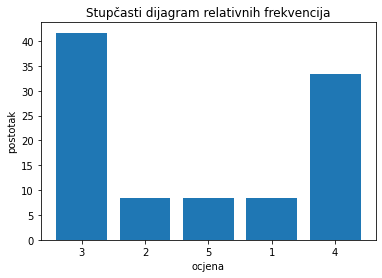

In [14]:
df_ocjena = df_ucenik.groupby(["ocjena"]).count()[['rb']]
df_ocjena['postotak'] = (df_ocjena['rb'] / df_ocjena['rb'].sum()) * 100

left = [1, 2, 3, 4, 5]
tick_label = ['3', '2', '5', '1', '4']
  
plt.bar(left, df_ocjena['postotak'], tick_label = tick_label)
plt.xlabel('ocjena')
plt.ylabel('postotak')
plt.title('Stupčasti dijagram relativnih frekvencija')
plt.show()

In [15]:
print(df_vrijeme)

              vrijeme_igre  postotak
vrijeme_igre                        
(-1, 30]                 5      20.8
(30, 60]                 3      12.5
(60, 90]                 7      29.2
(90, 120]                2       8.3
(120, 150]               2       8.3
(150, 180]               2       8.3
(180, 210]               2       8.3
(210, 240]               0       0.0
(240, 270]               1       4.2


(array([ 6., 10.,  3.,  4.,  1.,  0.]),
 array([  0,  50, 100, 150, 200, 250, 300]),
 <a list of 6 Patch objects>)

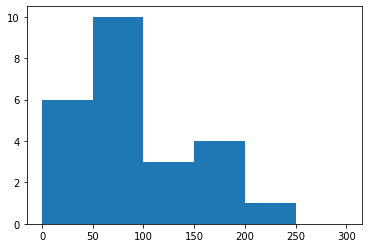

In [16]:
plt.hist(df_ucenik['vrijeme_igre'], bins = [0,50,100,150,200,250,300])

**Zadatak 1.3.**

In [17]:
df_zdravstveno = pd.read_csv("zdravstveno.csv", sep=';')

In [18]:
round(df_zdravstveno[df_zdravstveno['cijena'] > 200].shape[0]/df_zdravstveno.shape[0]*100,0)

26.0

In [19]:
round(df_zdravstveno[df_zdravstveno['cijena'] > 200].shape[0]/df_zdravstveno.shape[0], 1)*100

30.0

In [20]:
round(df_zdravstveno[df_zdravstveno['cijena'] > 150].shape[0]/df_zdravstveno.shape[0], 3)*100

65.8

### 1.4. Prosjek

In [21]:
d = [3, 5, 7, 2, 1, 7, 4, 3, 5, 5]
df = pd.DataFrame(d)
df.mean()

0    4.2
dtype: float64

In [22]:
d = [3, 5, 7, 2, 1, 7, 4, 3, 5, 5, 4]
df = pd.DataFrame(d)
df.mean().round(3)

0    4.182
dtype: float64

In [23]:
d = [3, 5, 7, 2, 1, 7, 4, 3, 5, 5, 50]
df = pd.DataFrame(d)
df.mean().round(3)

0    8.364
dtype: float64

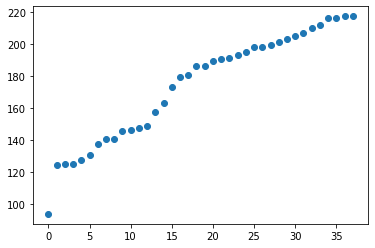

In [24]:
plt.scatter(df_zdravstveno.index, df_zdravstveno['cijena'])

In [25]:
df_ucenik['vrijeme_igre'].mean().round(2)

89.96

**Zadatak 1.4**

In [26]:
update_df = df_ucenik.drop([1,11])
update_df['vrijeme_igre'].mean()

87.5

In [27]:
selected = df_ucenik.iloc[[0,3,6,20]]
selected.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


rb               8.25
vrijeme_igre    64.00
vrijeme_pon     45.00
dtype: float64

In [28]:
niz1 = [0.0, 1.0, 2.0, 3.0, -1.0, -2.0, -3.0, 0.5, 0.7, 0.25, -1.0, -0.45]
niz2 = [-100, 100, 150, -75, -250, 200, -25]
df_niz1 = pd.DataFrame(niz1)
df_niz1.mean().round(0)

0   -0.0
dtype: float64

In [29]:
df_niz2 = pd.DataFrame(niz2)
df_niz2.mean()

0    0.0
dtype: float64

###1.5. Medijan

In [30]:
df_niz1.median()

0    0.125
dtype: float64

In [31]:
df_niz2.median()

0   -25.0
dtype: float64

In [32]:
df_ucenik['vrijeme_igre'].median()

75.0

### 1.6. Minimum, maksimum i raspon

In [33]:
df_ucenik['vrijeme_igre'].max()

244

In [34]:
df_ucenik['vrijeme_igre'].min()

0

In [35]:
df_ucenik['vrijeme_igre'].max() - df_ucenik['vrijeme_igre'].min()

244

### 1.7. Kvartili i interkvartilni raspon

In [36]:
df_ucenik['vrijeme_igre'].describe()

count     24.000000
mean      89.958333
std       66.764010
min        0.000000
25%       50.000000
50%       75.000000
75%      126.750000
max      244.000000
Name: vrijeme_igre, dtype: float64

In [37]:
np.percentile(df_ucenik['vrijeme_igre'], [25, 50, 75], interpolation='midpoint')

array([ 49. ,  75. , 129.5])

### 1.8. Varijanca i standardna devijacija

In [38]:
df_niz1.std().round(2)

0    1.65
dtype: float64

In [39]:
df_niz2.std().round(2)

0    158.77
dtype: float64

In [40]:
df_ucenik['vrijeme_igre'].std().round(2)

66.76

In [41]:
round(df_ucenik['vrijeme_igre'].std()**2, 0)

4457.0

### 1.9. Kutijasti dijagram

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff0ab83ae10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff0ab83f8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff0ab83a890>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff0ab8453d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff0ab845910>],
 'means': []}

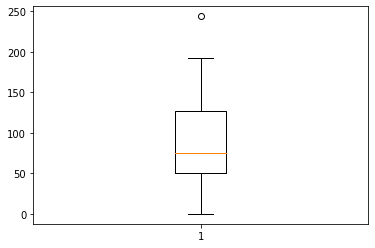

In [42]:
plt.boxplot(df_ucenik['vrijeme_igre'])


### 1.10. Dijagram raspršenosti

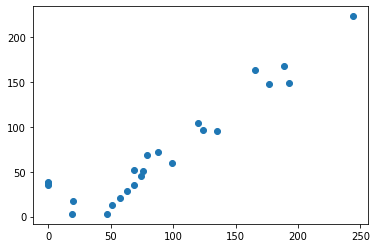

In [43]:
plt.scatter(df_ucenik['vrijeme_igre'], df_ucenik['vrijeme_pon'])

## 2 Osnove vjerojatnosti

In [44]:
randnums = np.random.randint(0,2,100)

In [45]:
randnums

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])